In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 3.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=7ce14684d07bb6b62b026a10b20d9690ddbbbaf0ec4a0e9f62b111e2db7a95d4
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [8]:
# tạo tín hiệu vào/ra

tp = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'temperature')
ws = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'windspeed')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1),'rainfall')

In [10]:
tp['very_low'] = fuzz.trimf(tp.universe,[20.4,23.9,27.7])
tp['low'] = fuzz.trimf(tp.universe,[24.2,27.7,31.2])
tp['average'] = fuzz.trimf(tp.universe,[27.7,31.2,34.7])
tp['high'] = fuzz.trimf(tp.universe,[31.2,34.7,38.1])
tp['very_high'] = fuzz.trimf(tp.universe,[34.7,38.1,41.2])

ws['very_low'] = fuzz.trimf(ws.universe,[0.7,1.1,1.5])
ws['low'] = fuzz.trimf(ws.universe,[1.1,1.5,1.9])
ws['average'] = fuzz.trimf(ws.universe,[1.5,1.9,2.3])
ws['very_high'] = fuzz.trimf(ws.universe,[2.3,2.7,3.1])
ws['high'] = fuzz.trimf(ws.universe,[1.9,2.3,2.7])

rainfall['very_low'] = fuzz.trimf(rainfall.universe,[0.2,1.7,3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe,[1.7,3.2,4.7])
rainfall['average'] = fuzz.trimf(rainfall.universe,[3.2,4.7,6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe,[4.7,6.2,7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe,[6.2,7.7,9.2])


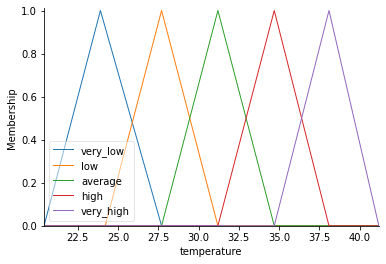

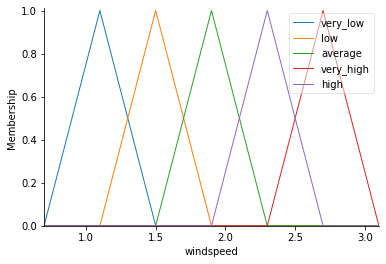

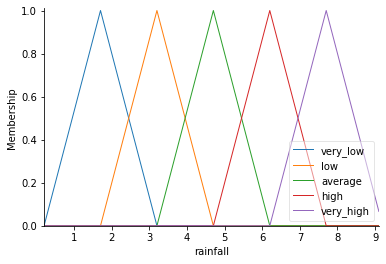

In [11]:
tp.view()
ws.view()
rainfall.view()

In [12]:
rule1 = ctrl.Rule(tp['very_low'] & ws['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(tp['very_low'] & ws['low'], rainfall['very_low'])
rule3 = ctrl.Rule(tp['very_low'] & ws['average'], rainfall['low'])
rule4 = ctrl.Rule(tp['very_low'] & ws['high'], rainfall['low'])
rule5 = ctrl.Rule(tp['very_low'] & ws['very_high'], rainfall['average'])
rule6 = ctrl.Rule(tp['low'] & ws['very_low'], rainfall['very_low'])
rule7 = ctrl.Rule(tp['low'] & ws['low'], rainfall['low'])
rule8 = ctrl.Rule(tp['low'] & ws['average'], rainfall['low'])
rule9 = ctrl.Rule(tp['low'] & ws['high'], rainfall['average'])
rule10 = ctrl.Rule(tp['low'] & ws['very_high'], rainfall['average'])
rule11 = ctrl.Rule(tp['average'] & ws['very_low'], rainfall['low'])
rule12 = ctrl.Rule(tp['average'] & ws['low'], rainfall['average'])
rule13 = ctrl.Rule(tp['average'] & ws['average'], rainfall['average'])
rule14 = ctrl.Rule(tp['average'] & ws['high'], rainfall['average'])
rule15 = ctrl.Rule(tp['average'] & ws['very_high'], rainfall['high'])
rule16 = ctrl.Rule(tp['high'] & ws['very_low'], rainfall['low'])
rule17 = ctrl.Rule(tp['high'] & ws['low'], rainfall['average'])
rule18 = ctrl.Rule(tp['high'] & ws['average'], rainfall['high'])
rule19 = ctrl.Rule(tp['high'] & ws['high'], rainfall['high'])
rule20 = ctrl.Rule(tp['high'] & ws['very_high'], rainfall['very_high'])
rule21 = ctrl.Rule(tp['very_high'] & ws['very_low'], rainfall['average'])
rule22 = ctrl.Rule(tp['very_high'] & ws['low'], rainfall['average'])
rule23 = ctrl.Rule(tp['very_high'] & ws['average'], rainfall['high'])
rule24 = ctrl.Rule(tp['very_high'] & ws['high'], rainfall['very_high'])
rule25 = ctrl.Rule(tp['very_high'] & ws['very_high'], rainfall['very_high'])

In [13]:
rainfall_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rf = ctrl.ControlSystemSimulation(rainfall_ctrl)

1.7000000000000026


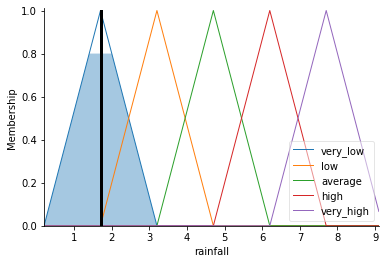

In [14]:
rf.input['temperature'] = 27
rf.input['windspeed'] = 1.1
rf.compute()
print(rf.output['rainfall'])
rainfall.view(sim = rf)